In [67]:
import pandas as pd


In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [70]:
ds_salary = pd.read_csv('ds_salary_2021_2023(2).csv', sep=';')


In [71]:
print(ds_salary)

      work_year experience_level employment_type                  job_title  \
0          2023               EN              FT          Applied Scientist   
1          2023               EN              FT          Applied Scientist   
2          2023               EN              FT       Data Quality Analyst   
3          2023               EN              FT    Compliance Data Analyst   
4          2023               EN              FT          Applied Scientist   
...         ...              ...             ...                        ...   
3756       2020               SE              FT   Principal Data Scientist   
3757       2020               SE              FT             Data Scientist   
3758       2020               SE              FT       Data Science Manager   
3759       2020               SE              FT  Machine Learning Engineer   
3760       2020               SE              FT             Data Scientist   

      salary salary_currency  salary_in_usd company

In [72]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [73]:
ds_salary.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S
3760,2020,SE,FT,Data Scientist,412000,USD,412000,US,L


In [74]:
ds_salary = pd.DataFrame(ds_salary)
display(ds_salary)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [75]:
ds_salary = ds_salary.drop_duplicates()
ds_salary = ds_salary.dropna()
display(ds_salary)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [76]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         2410 non-null   int64 
 1   experience_level  2410 non-null   object
 2   employment_type   2410 non-null   object
 3   job_title         2410 non-null   object
 4   salary            2410 non-null   int64 
 5   salary_currency   2410 non-null   object
 6   salary_in_usd     2410 non-null   int64 
 7   company_location  2410 non-null   object
 8   company_size      2410 non-null   object
dtypes: int64(3), object(6)
memory usage: 188.3+ KB


In [77]:
ds_salary.rename(columns={'work_year':'Ano de Trabalho'}, inplace=True)
ds_salary.rename(columns={'experience_level':'Nivel de Experiencia'}, inplace=True)
ds_salary.rename(columns={'employment_type':'Carga Horaria'}, inplace=True)
ds_salary.rename(columns={'job_title':'Cargo'}, inplace=True)
ds_salary.rename(columns={'salary':'Salario'}, inplace=True)
ds_salary.rename(columns={'salary_currency':'Moeda'}, inplace=True)
ds_salary.rename(columns={'salary_in_usd':'Salario em Dolar'}, inplace=True)
ds_salary.rename(columns={'company_location':'Localizacao da Empresa'}, inplace=True)
ds_salary.rename(columns={'company_size':'Tamanho da Empresa'}, inplace=True)

In [78]:
ds_salary = ds_salary.replace([float('NaN')],'-')

In [79]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano de Trabalho         2410 non-null   int64 
 1   Nivel de Experiencia    2410 non-null   object
 2   Carga Horaria           2410 non-null   object
 3   Cargo                   2410 non-null   object
 4   Salario                 2410 non-null   int64 
 5   Moeda                   2410 non-null   object
 6   Salario em Dolar        2410 non-null   int64 
 7   Localizacao da Empresa  2410 non-null   object
 8   Tamanho da Empresa      2410 non-null   object
dtypes: int64(3), object(6)
memory usage: 188.3+ KB


In [80]:
contagem_cientista_dados = ds_salary['Cargo'].value_counts().get("Data Scientist", 0)
print(contagem_cientista_dados)


492


In [81]:
contagem_engenheiro_dados = ds_salary['Cargo'].value_counts().get("Data Engineer", 0)
print(contagem_engenheiro_dados)

529


In [82]:
contagem_analista_dados = ds_salary['Cargo'].value_counts().get("Data Analyst", 0)
print(contagem_analista_dados)

356


In [83]:
grupo_profissao = ds_salary.groupby('Cargo')


In [84]:
media_salario_por_profissao = grupo_profissao['Salario'].mean()


In [85]:
media_cientista_dados = media_salario_por_profissao.get("Data Scientist", 0)
media_engenheiro_dados = media_salario_por_profissao.get("Data Engineer", 0)
media_analista_dados= media_salario_por_profissao.get("Data Analyst", 0)

In [86]:
print(f'Média de salário para Cientista de Dados: {media_cientista_dados}')
print(f'Média de salário para Engenheiro de Dados: {media_engenheiro_dados}')
print(f'Média de salário para Analista de Dados: {media_analista_dados}')



Média de salário para Cientista de Dados: 298126.743902439
Média de salário para Engenheiro de Dados: 165101.8582230624
Média de salário para Analista de Dados: 118523.62640449438


In [87]:
media_cientista_dados_formatada = round(media_cientista_dados, 2)
media_engenheiro_ddados_formatada = round(media_engenheiro_dados, 2)
media_analista_dados_formatada = round(media_analista_dados, 2)

In [88]:
media_cientista_dados = 298126.743902439
media_engenheiro_dados = 165101.8582230624
media_analista_dados = 118523.62640449438

In [89]:
diferenca_engenheiro = media_cientista_dados - media_engenheiro_dados
diferenca_analista = media_cientista_dados - media_analista_dados



In [90]:
porcentagem_a_mais_engenheiro = (diferenca_engenheiro / media_engenheiro_dados) * 100
porcentagem_a_mais_analista = (diferenca_analista / media_analista_dados) * 100

In [91]:
print(f"O salário de Cientista de Dados é {porcentagem_a_mais_engenheiro:.2f}% a mais do que o salário de Engenheiro de Dados.")
print(f"O salário de Cientista de Dados é {porcentagem_a_mais_analista:.2f}% a mais do que o salário de Analista de Dados.")


O salário de Cientista de Dados é 80.57% a mais do que o salário de Engenheiro de Dados.
O salário de Cientista de Dados é 151.53% a mais do que o salário de Analista de Dados.


In [92]:
sns.set_theme(style="darkgrid")


In [93]:
medias = [media_cientista_dados, media_engenheiro_dados, media_analista_dados]


In [94]:
profissoes = ["Cientista de Dados", "Engenheiro de Dados", "Analista de Dados"]


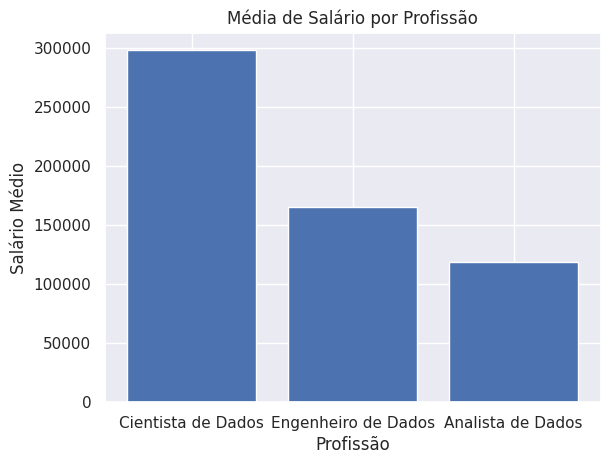

In [95]:
plt.bar(profissoes, medias)
plt.xlabel('Profissão')
plt.ylabel('Salário Médio')
plt.title('Média de Salário por Profissão')

plt.show()


In [96]:
paises = ds_salary['Localizacao da Empresa'].unique()
print(paises)

['US' 'NG' 'IN' 'CA' 'ES' 'GH' 'DE' 'CH' 'AU' 'SE' 'BR' 'GB' 'VN' 'BA'
 'GR' 'HK' 'NL' 'FI' 'IE' 'SG' 'SI' 'MX' 'FR' 'HR' 'AM' 'KE' 'RO' 'TH'
 'CF' 'UA' 'IL' 'CO' 'PT' 'EE' 'LV' 'MK' 'PK' 'IT' 'MA' 'AR' 'CR' 'IR'
 'HU' 'AS' 'BE' 'AT' 'ID' 'LU' 'MY' 'CZ' 'DZ' 'RU' 'PL' 'LT' 'TR' 'BO'
 'EG' 'AL' 'SK' 'PR' 'AE' 'DK' 'IQ' 'CN' 'BS' 'JP' 'CL' 'MD' 'MT' 'PH'
 'HN' 'NZ']


In [97]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [98]:
contagem_por_pais = cientistas_de_dados.groupby('Localizacao da Empresa').size().reset_index(name='Quantidade de Cientistas de Dados')
print(contagem_por_pais)


   Localizacao da Empresa  Quantidade de Cientistas de Dados
0                      AT                                  2
1                      AU                                  2
2                      BE                                  2
3                      BR                                  4
4                      CA                                 18
5                      CH                                  2
6                      CL                                  1
7                      DE                                 13
8                      DZ                                  1
9                      EE                                  1
10                     ES                                 10
11                     FR                                 14
12                     GB                                 29
13                     HK                                  1
14                     HU                                  2
15                     I

In [99]:
contagem_por_pais = contagem_por_pais.sort_values(by='Quantidade de Cientistas de Dados', ascending=False)
top_4_paises = contagem_por_pais.head(4)


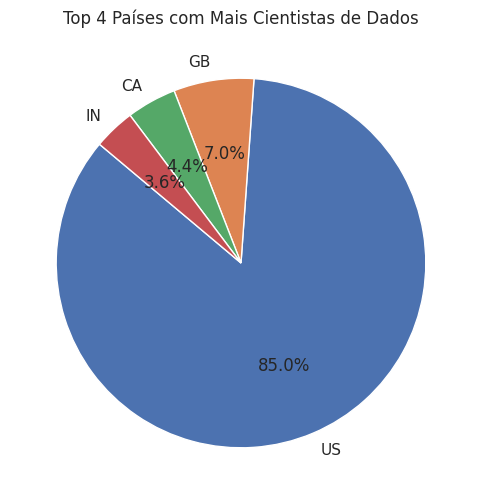

In [100]:
plt.figure(figsize=(10, 6))
plt.pie(top_4_paises['Quantidade de Cientistas de Dados'], labels=top_4_paises['Localizacao da Empresa'], autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Países com Mais Cientistas de Dados')
plt.show()

In [101]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [102]:
agrupacao_por_nivel = cientistas_de_dados.groupby('Nivel de Experiencia').size().reset_index(name='Quantidade')


In [103]:
agrupacao_por_nivel['Cargo'] = 'Data Scientist'

print(agrupacao_por_nivel)

  Nivel de Experiencia  Quantidade           Cargo
0                   EN          57  Data Scientist
1                   EX           8  Data Scientist
2                   MI         140  Data Scientist
3                   SE         287  Data Scientist


In [104]:
#Nível de Experiência = EN (Nível Básico), EX (Experiente), MI (Nível Médio), SE (Sênior).

In [105]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [106]:
contagem_por_nivel = cientistas_de_dados['Nivel de Experiencia'].value_counts().reset_index()


In [107]:
contagem_por_nivel.columns = ['Nível de Experiência', 'Quantidade']


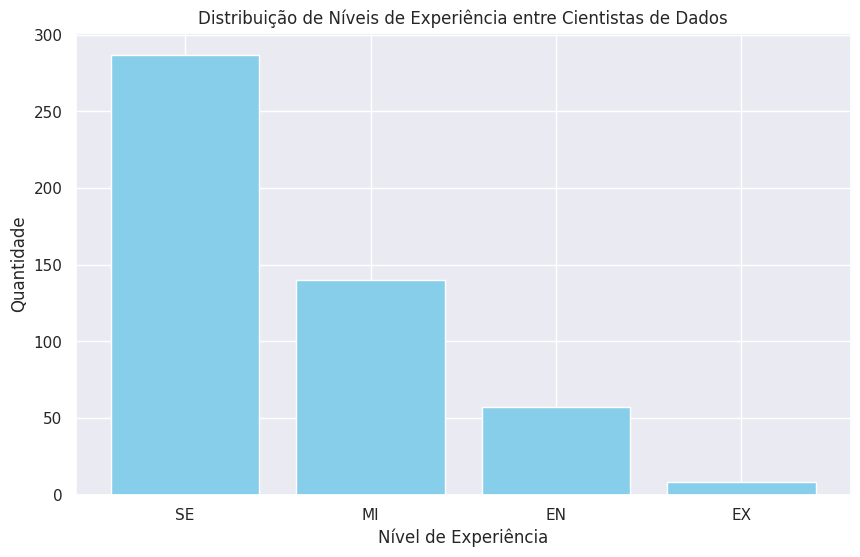

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_nivel['Nível de Experiência'], contagem_por_nivel['Quantidade'], color='skyblue')
plt.xlabel('Nível de Experiência')
plt.ylabel('Quantidade')
plt.title('Distribuição de Níveis de Experiência entre Cientistas de Dados')
plt.show()

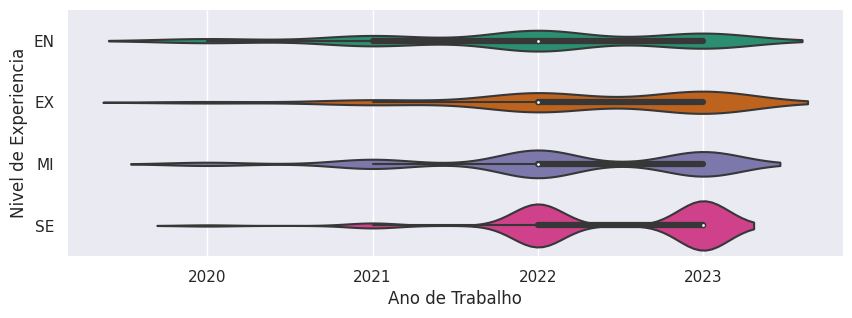

In [109]:
figsize = (10, 0.8 * len(ds_salary['Nivel de Experiencia'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ds_salary, x='Ano de Trabalho', y='Nivel de Experiencia', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)